<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_6_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Demonstration 6.2.2 Implementing agglomerative hierarchical clustering
Follow the demonstration to see how to implement agglomerative hierarchical clustering and how to simplify the process using scikit-learn. In this demonstration, you’ll learn how:
- to perform hierarchical clustering using SciPy and scitkit-learn
- the effects of outliers and scaling on the final results
- to compare the results for different linkage methods.

## a. Hierarchical clustering using SciPy

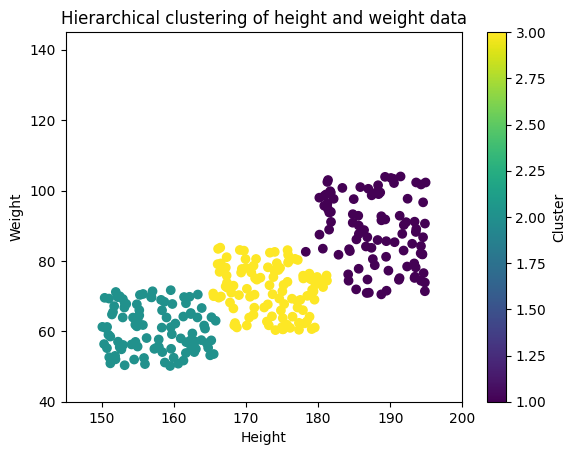

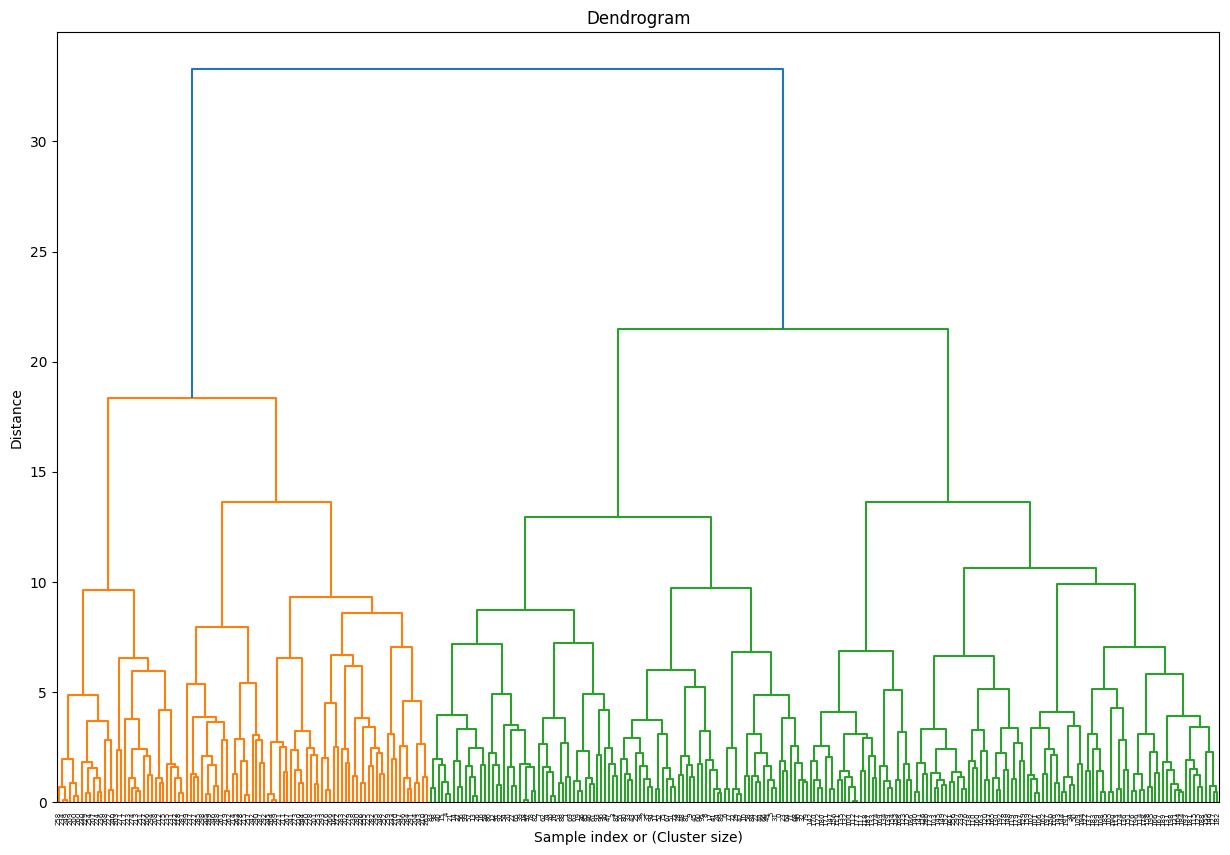

In [ ]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Data generation.
np.random.seed(42)

N = 100
height_S = np.random.uniform(150, 166, N)
weight_S = np.random.uniform(50, 72, N)
height_M = np.random.uniform(166, 180, N)
weight_M = np.random.uniform(60, 84, N)
height_L = np.random.uniform(180, 195, N)
weight_L = np.random.uniform(70, 104, N)

height = np.concatenate([height_S, height_M, height_L])
weight = np.concatenate([weight_S, weight_M, weight_L])

data = np.column_stack((height, weight))

# Hierarchical clustering from scratch
def hierarchical_clustering(data, method='average'):
    dists = pdist(data, metric='euclidean')
    linkage_matrix = linkage(dists, method=method)
    return linkage_matrix

# Compute the linkage matrix
linkage_matrix = hierarchical_clustering(data)


# Number of clusters we want to extract
k = 3

# Retrieve the clusters
clusters = fcluster(linkage_matrix, k, criterion='maxclust')

# Plot the data and color by cluster
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical clustering of height and weight data')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.xlim(145, 200)
plt.ylim(40, 145)
plt.colorbar(label='Cluster')
plt.show()


# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index or (Cluster size)')
plt.ylabel('Distance')
plt.show()

## b. Hierarchical clustering using scikit-learn

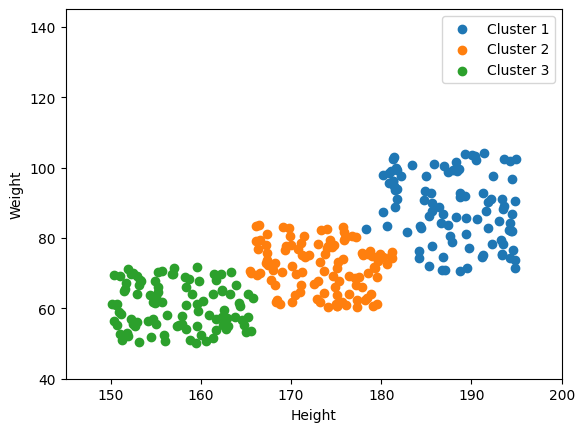

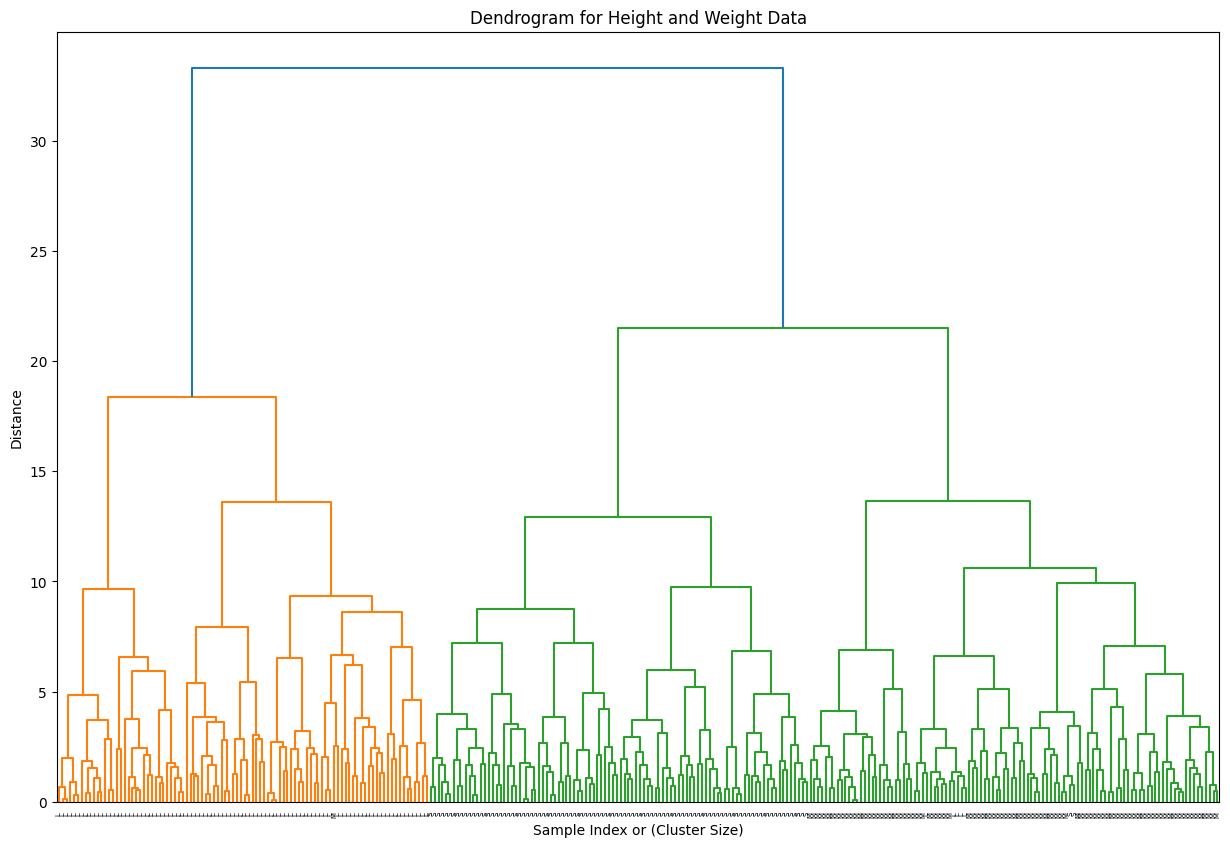

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Data generation (same as before)
np.random.seed(42)
N = 100
height_S = np.random.uniform(150, 166, N)
weight_S = np.random.uniform(50, 72, N)
size_S = ['S'] * N

height_M = np.random.uniform(166, 180, N)
weight_M = np.random.uniform(60, 84, N)
size_M = ['M'] * N

height_L = np.random.uniform(180, 195, N)
weight_L = np.random.uniform(70, 104, N)
size_L = ['L'] * N

# Combine the data
height = np.concatenate([height_S, height_M, height_L])
weight = np.concatenate([weight_S, weight_M, weight_L])
size = np.concatenate([size_S, size_M, size_L])

# Create a DataFrame
data = pd.DataFrame({'height': height, 'weight': weight, 'size': size})

# Perform Hierarchical Agglomerative Clustering
agglo_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
data['cluster'] = agglo_cluster.fit_predict(data[['height', 'weight']])

# Plotting the clusters
for cluster_idx in range(3):
    cluster_data = data[data['cluster'] == cluster_idx]
    plt.scatter(cluster_data['height'], cluster_data['weight'], label=f'Cluster {cluster_idx + 1}')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.xlim(145, 200)
plt.ylim(40, 145)
plt.legend()
plt.show()

# Creating the linkage matrix and plotting the dendrogram
Z = linkage(data[['height', 'weight']], method='average')
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=data['size'].values)
plt.title('Dendrogram for Height and Weight Data')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()


## c. Hierarchical clustering with outliers

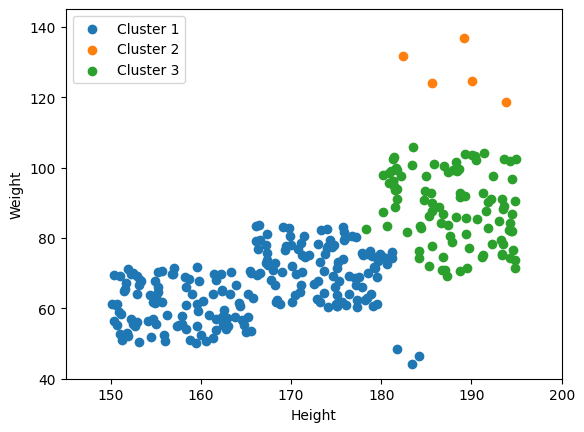

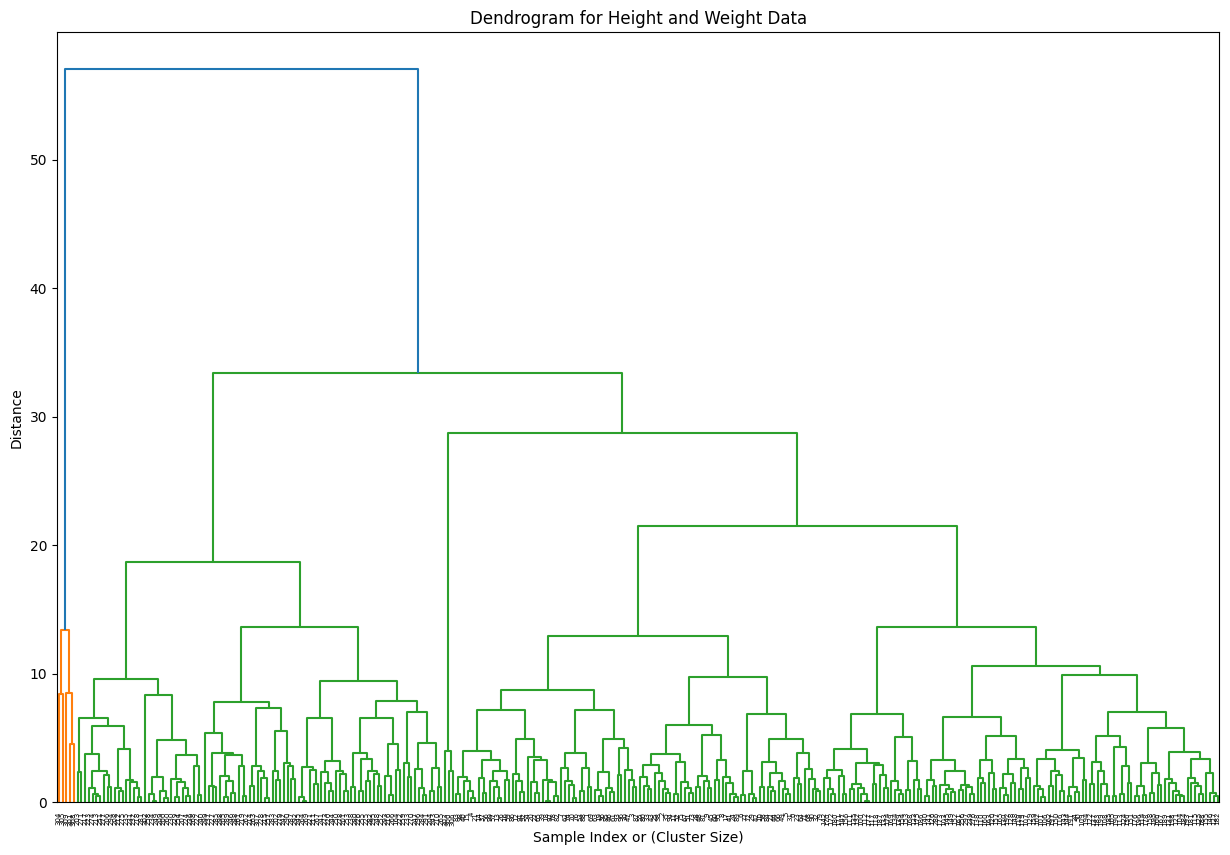

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Existing data generation
N = 100
np.random.seed(42)
height_S = np.random.uniform(150, 166, N)
weight_S = np.random.uniform(50, 72, N)
height_M = np.random.uniform(166, 180, N)
weight_M = np.random.uniform(60, 84, N)
height_L = np.random.uniform(180, 195, N)
weight_L = np.random.uniform(70, 104, N)


# Generate outliers
N_outliers = 10
height_outliers = np.random.uniform(180, 200, N_outliers)  # Extreme values
weight_outliers = np.random.uniform(40, 145, N_outliers)   # Extreme values

# Combine data
height = np.concatenate([height_S, height_M, height_L, height_outliers])
weight = np.concatenate([weight_S, weight_M, weight_L, weight_outliers])

# Create DataFrame
data = pd.DataFrame({'height': height, 'weight': weight})



# Perform Hierarchical Agglomerative Clustering
agglo_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
data['cluster'] = agglo_cluster.fit_predict(data[['height', 'weight']])

# Plotting the clusters
for cluster_idx in range(3):
    cluster_data = data[data['cluster'] == cluster_idx]
    plt.scatter(cluster_data['height'], cluster_data['weight'], label=f'Cluster {cluster_idx + 1}')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.xlim(145, 200)
plt.ylim(40, 145)
plt.legend()
plt.show()

# Creating the linkage matrix and plotting the dendrogram
Z = linkage(data[['height', 'weight']], method='average')
plt.figure(figsize=(15, 10))
dendrogram(Z)
plt.title('Dendrogram for Height and Weight Data')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()


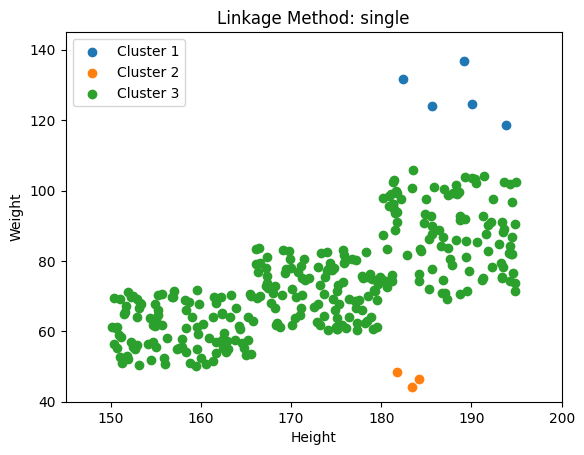

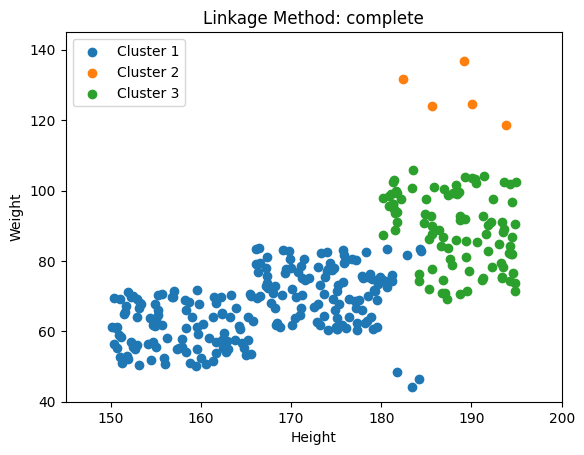

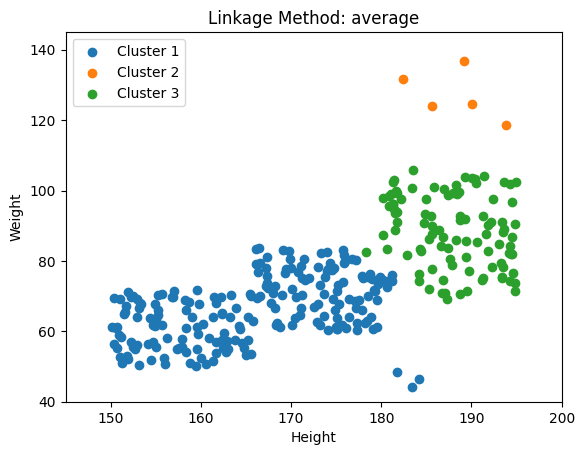

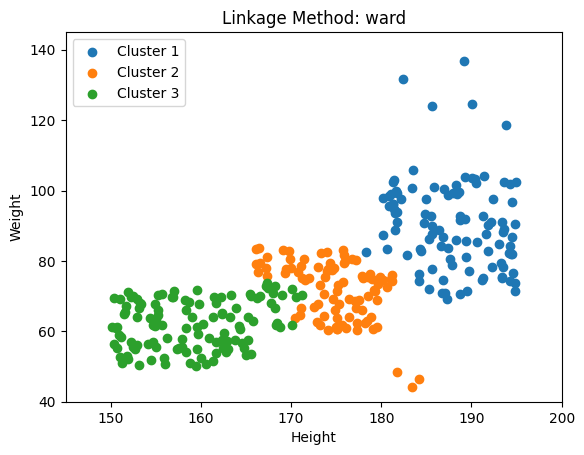

In [ ]:
for lnk in ["single","complete","average","ward"]: #Note: ward here denotes centroid-linkage
  # Perform Hierarchical agglomerative clustering.
  agglo_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage=lnk)
  data['cluster'] = agglo_cluster.fit_predict(data[['height', 'weight']])

  # Plotting the clusters.
  for cluster_idx in range(3):
      cluster_data = data[data['cluster'] == cluster_idx]
      plt.scatter(cluster_data['height'], cluster_data['weight'], label=f'Cluster {cluster_idx + 1}')

  plt.xlabel('Height')
  plt.ylabel('Weight')
  plt.xlim(145, 200)
  plt.ylim(40, 145)
  plt.title(f"Linkage method: {lnk}")
  plt.legend()
  plt.show()

## d. Hierarchical clustering with feature scalling

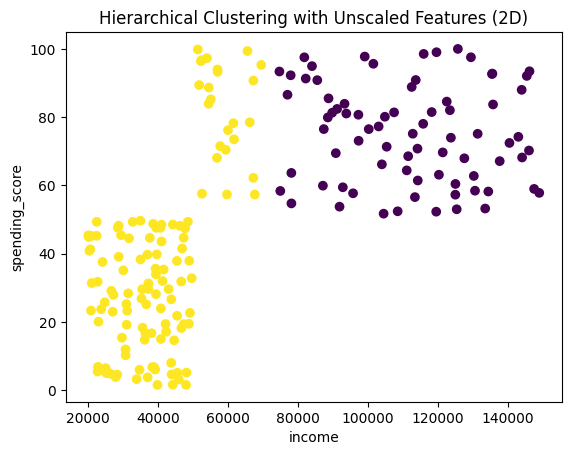

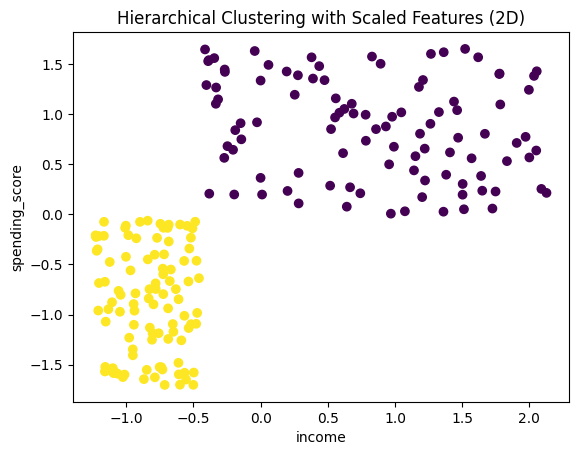

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Data generation (same as before)
N = 100
np.random.seed(42)

age_young = np.random.uniform(18, 35, N)
age_old = np.random.uniform(36, 65, N)

income_low = np.random.uniform(20000, 50000, N)
income_high = np.random.uniform(50001, 150000, N)

spending_low = np.random.uniform(1, 50, N)
spending_high = np.random.uniform(51, 100, N)

age = np.concatenate([age_young, age_old])
income = np.concatenate([income_low, income_high])
spending = np.concatenate([spending_low, spending_high])

data = pd.DataFrame({'age': age, 'income': income, 'spending_score': spending})

# Function to perform Hierarchical clustering and plot the clusters in 2D
def plot_hierarchical_clustering(data, features, scaled=False):
    # Extract the selected features
    X = data[features].values

    # Optionally scale the features
    if scaled:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Perform Hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
    labels = clustering.fit_predict(X)

    # 2D scatter plot
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

    # Labeling axes
    plt.xlabel(features[0])
    plt.ylabel(features[1])

    # Title
    if scaled:
        plt.title('Hierarchical Clustering with Scaled Features (2D)')
    else:
        plt.title('Hierarchical Clustering with Unscaled Features (2D)')

    # Show plot
    plt.show()

# Choose two features for 2D plotting
selected_features = ['income', 'spending_score']

# Plot unscaled data
plot_hierarchical_clustering(data, selected_features, scaled=False)

# Plot scaled data
plot_hierarchical_clustering(data, selected_features, scaled=True)


## e. Linkage Method Comparison

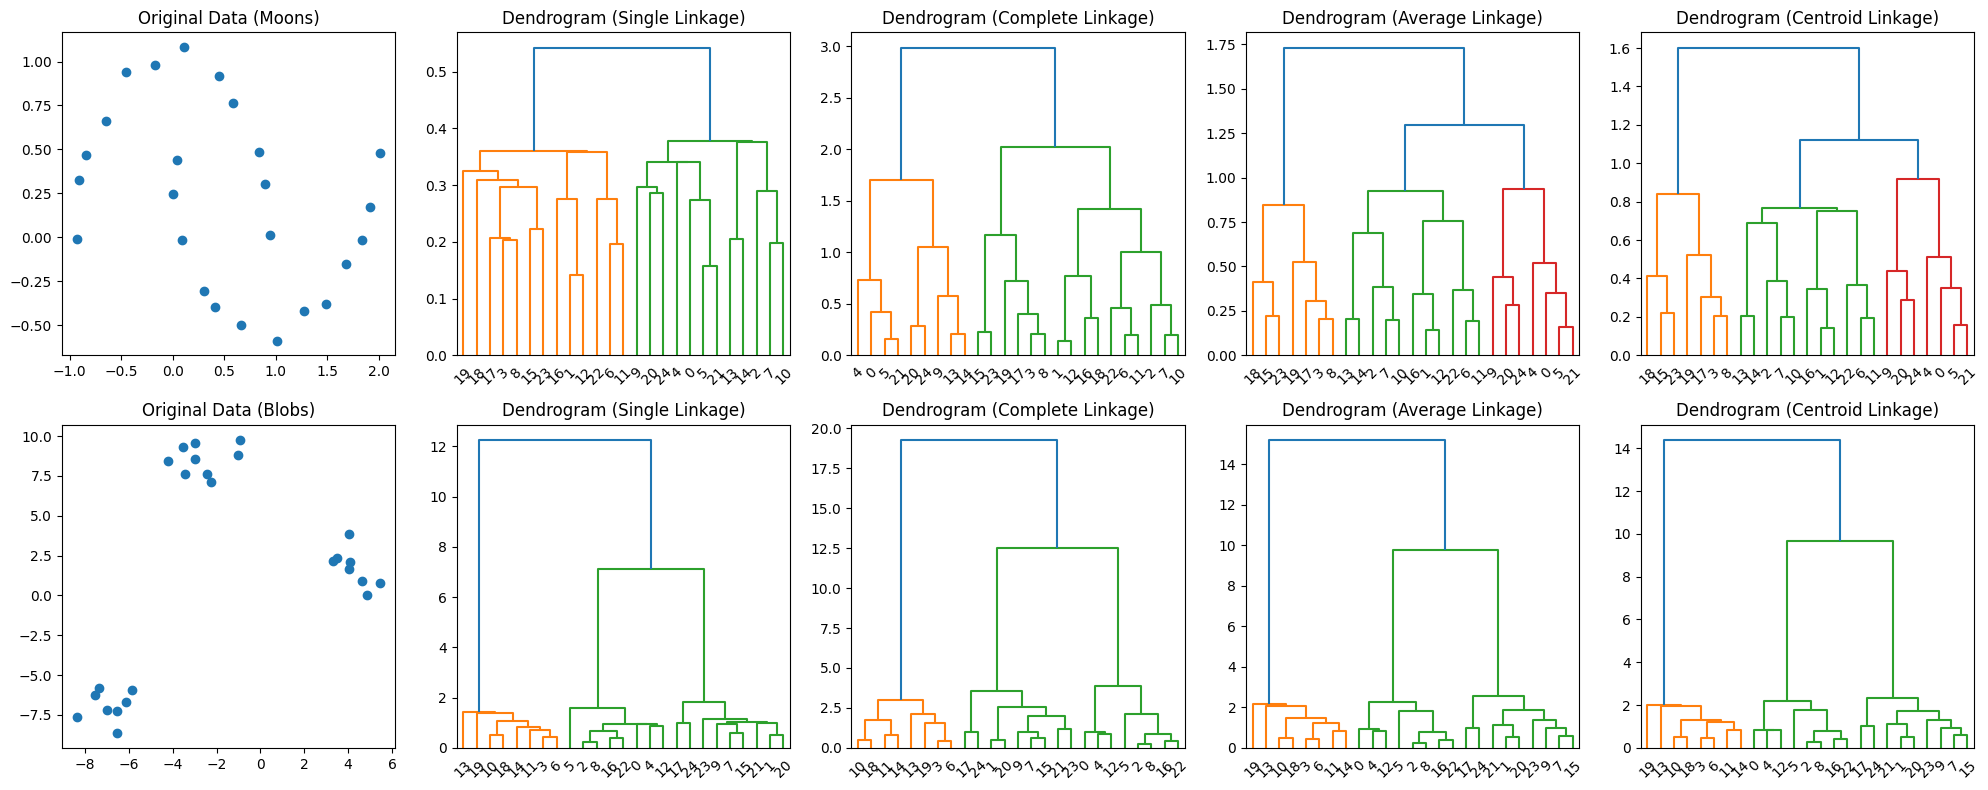

In [ ]:
# Corrected and combined Python code

import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_moons, make_blobs

# Function to create a dendrogram using a given linkage metric
def plot_dendrogram(X, method, ax):
    linked = linkage(X, method=method)
    dendrogram(linked, ax=ax)
    ax.set_title(f'Dendrogram ({method.capitalize()} Linkage)')

# Create two different datasets
# Dataset 1: Two interleaving half circles (moons)
X_moons, _ = make_moons(n_samples=25, noise=0.05, random_state=42)
# Dataset 2: Gaussian blobs
X_blobs, _ = make_blobs(n_samples=25, centers=3, n_features=2, random_state=42)

# Create a new plotting setup with the correct indexing
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Adjust the subplot grid to 2 rows, 5 columns

# Plot the original data on the first plot for moons and blobs
axes[0, 0].scatter(X_moons[:, 0], X_moons[:, 1])
axes[0, 0].set_title('Original Data (Moons)')
axes[1, 0].scatter(X_blobs[:, 0], X_blobs[:, 1])
axes[1, 0].set_title('Original Data (Blobs)')

# Define the linkage methods
linkage_methods = ['single', 'complete', 'average', 'centroid']

# Plot dendrograms for each linkage method on the "moons" dataset
for i, method in enumerate(linkage_methods):
    plot_dendrogram(X_moons, method, axes[0, i+1])  # i+1 to plot in the next columns

# Plot dendrograms for each linkage method on the "blobs" dataset
for i, method in enumerate(linkage_methods):
    plot_dendrogram(X_blobs, method, axes[1, i+1])  # i+1 to plot in the next columns

# Display the plots
plt.tight_layout()
plt.show()


# Key information
This demonstration illustrated the how to perform hierarchical clustering using scipy and scitkit-learn, the effect of outliers and scaling on the final results, and how to compare the results for different linkage methods.

## Reflect
What are the practical applications of this technique?

> Select the pen from the toolbar to add your entry.